## Import libraries

In [5]:
import numpy as np
import os
import glob
import cv2
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Define dataset paths

In [6]:
train_dir = './chest_Xray/train'
val_dir =  './chest_Xray/val'
test_dir = './chest_Xray/test'

## Define image size

In [7]:
image_size = (150, 150)

## Load and preprocess images

In [8]:
# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for folder_name in os.listdir(directory):
        label = folder_name.lower()
        folder_path = os.path.join(directory, folder_name)
        for img_path in glob.glob(os.path.join(folder_path, '*.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            images.append(img.flatten())
            labels.append(label)
    return np.array(images), np.array(labels)

# Load train, validation, and test images
X_train, y_train = load_images(train_dir)
X_val, y_val = load_images(val_dir)
X_test, y_test = load_images(test_dir)

## Label encoding

In [9]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

## Define random forest model

In [10]:
model = xgb.XGBClassifier()

## Train model

In [11]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Evaluate the model on the test set

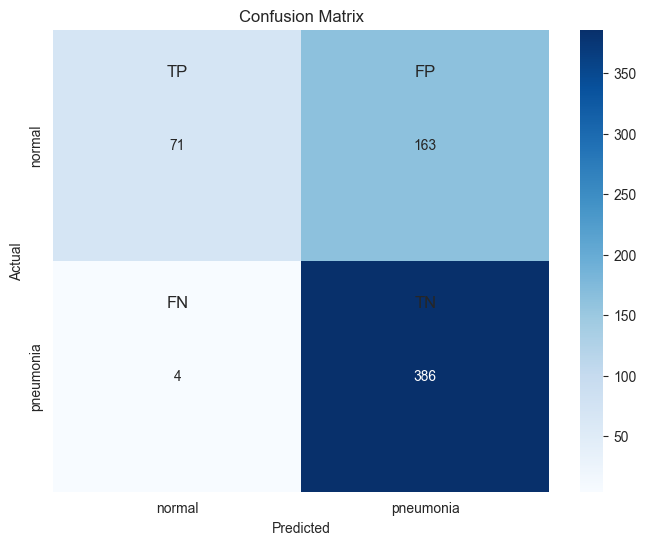

Accuracy: 0.7324
Precision: 0.7031
Recall: 0.9897
ROC-AUC: 0.6466


In [22]:
test_predictions = model.predict(X_test)

cm = confusion_matrix(y_test, test_predictions)
tn, fp, fn, tp = cm.ravel()

class_names = label_encoder.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add TP, FP, FN, TN labels
plt.text(0.5, 0.2, 'TP', fontsize=12, ha='center')
plt.text(1.5, 0.2, 'FP', fontsize=12, ha='center')
plt.text(0.5, 1.2, 'FN', fontsize=12, ha='center')
plt.text(1.5, 1.2, 'TN', fontsize=12, ha='center')

plt.show()

accuracy_score = accuracy_score(y_test, test_predictions)
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
roc_auc_score = roc_auc_score(y_test, test_predictions)

print(f"Accuracy: {accuracy_score:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"ROC-AUC: {roc_auc_score:.4f}")

## Predict a single image

In [17]:
image_path = './chest_Xray/test/PNEUMONIA/person1_virus_6.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, image_size)
img_flat = img.reshape(1, -1)

prediction = model.predict(img_flat)

if prediction[0] == 0:
    predicted_label = 'NORMAL'
else:
    predicted_label = 'PNEUMONIA'

print("Predicted Label:", predicted_label)

Predicted Label: PNEUMONIA
